<h1>Tratamento de Outliers</h1>

In [67]:
import random
import pandas as pd
import numpy as np

In [68]:
df = pd.DataFrame([random.gauss(0, sigma=1) for i in range(5000)], columns=['value'])
df.loc[df.sample(10).index,'value'] += 3
df.loc[df.sample(10).index,'value'] -= 3
df.head()

,value
0,0.104153
1,0.026137
2,1.116051
3,1.430365
4,0.024391


In [69]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
print('Q1', Q1)
print('Q3', Q3)
print('IQR', IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print('Normal Range', lower_bound, '-', upper_bound)

Q1 -0.690101296521211
Q3 0.6554581419167954
IQR 1.3455594384380065
Normal Range -2.7084404541782208 - 2.6737972995738053


In [70]:
df['value'].describe(percentiles=[0.01, 0.1, 0.25, 0.50, 0.75, 0.90, 0.99])

count    5000.000000
mean       -0.002499
std         1.017709
min        -4.128654
1%         -2.343803
10%        -1.305298
25%        -0.690101
50%         0.005615
75%         0.655458
90%         1.310898
99%         2.380869
max         5.814096
Name: value, dtype: float64

<AxesSubplot:xlabel='value'>

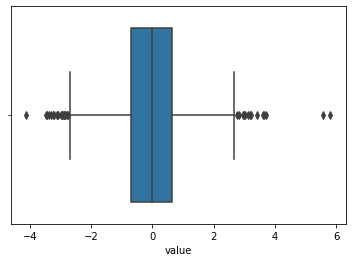

In [71]:
import seaborn as sns
sns.boxplot(data=df, x=df['value'])

In [72]:
from scipy import stats
z = np.abs(stats.zscore(df.value))
print(z.head())

0    0.104806
1    0.028140
2    1.099195
3    1.408072
4    0.026424
Name: value, dtype: float64


In [73]:
df[(df['value'] < df['value'].mean() - 3 * df['value'].std()) | (df['value'] > df['value'].mean() + 3 * df['value'].std())].shape

(19, 1)

In [74]:
df[z>3].shape

(19, 1)

In [75]:
new_df = df[z<3]
new_df.shape

(4981, 1)

In [76]:
lower_bound = df.value.mean()-3*df.value.std()
upper_bound = df.value.mean()+3*df.value.std()
df[df.value < lower_bound] = lower_bound
df[df.value > upper_bound] = upper_bound
print('lower_bound', lower_bound)
print('upper_bound', upper_bound)

lower_bound -3.055625742333898
upper_bound 3.0506285745188566


In [77]:
df.describe(percentiles=[0.01, 0.1, 0.25, 0.50, 0.75, 0.90, 0.99])

,value
count,5000.000000
mean,-0.003490
std,1.009527
min,-3.055626
1%,-2.343803
10%,-1.305298
25%,-0.690101
50%,0.005615
75%,0.655458
90%,1.310898


<AxesSubplot:xlabel='value'>

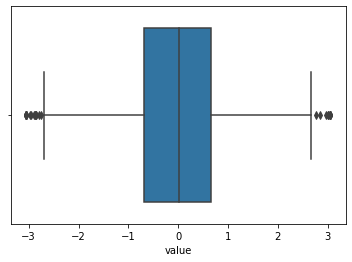

In [78]:
sns.boxplot(data=df, x=df['value'])